In [1]:
import os
import sys

sys.path.append("/home/yuri/github.com/AoesJP/project_pokereader")
sys.path

['/home/yuri/github.com/AoesJP/project_pokereader/notebooks/yuri_workspace',
 '/home/yuri/github.com/AoesJP/project_pokereader',
 '/home/yuri/.pyenv/versions/3.10.6/lib/python310.zip',
 '/home/yuri/.pyenv/versions/3.10.6/lib/python3.10',
 '/home/yuri/.pyenv/versions/3.10.6/lib/python3.10/lib-dynload',
 '',
 '/home/yuri/.pyenv/versions/3.10.6/envs/project_pokereader/lib/python3.10/site-packages',
 '/home/yuri/github.com/AoesJP/project_pokereader']

In [19]:
from pathlib import Path
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

import pyocr
from PIL import Image, ImageEnhance, ImageOps, ImageFilter

import pokedex.utils_dataset as pku
import pokedex.augmentation as pka
from pokedex.edges import deformer, draw
from pokedex import ocr

In [30]:
PROJECT_PATH = Path(".").absolute().parent.parent
DATA_PATH = PROJECT_PATH / "data"
DATA_PATH

PosixPath('/home/yuri/github.com/AoesJP/project_pokereader/data')

In [31]:
IMG_PATH = DATA_PATH / "pokemon_card.png"
IMG_PATH.as_posix()

'/home/yuri/github.com/AoesJP/project_pokereader/data/pokemon_card.png'

In [32]:
DATA_JSON_PATH = DATA_PATH / "dict_dataset_full.json"
DATA_JSON_PATH

PosixPath('/home/yuri/github.com/AoesJP/project_pokereader/data/dict_dataset_full.json')

In [33]:
DATA_JSON_LEFT = DATA_PATH / "dict_dataset_full.json"

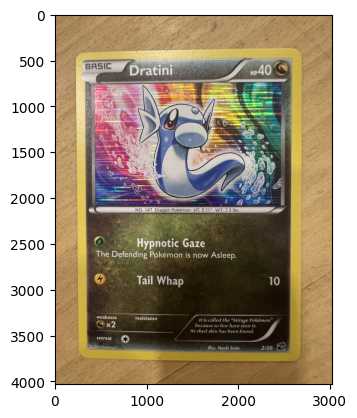

In [34]:
img_path = str(DATA_PATH / "IMG_1460.jpeg")
# img_path = str(DATA_PATH / "white_bg/dv1-2.jpg")
# img_path = str(DATA_PATH / "white_bg/IMG_1498.jpeg")
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
draw.show_color(img)

In [35]:
def crop_card(card_image, size=(72, 184)):
    """
    Input is a numpy array
    crop to (72, 184)
    """

    h, w, d = card_image.shape
    bottomleft = card_image[h - size[0] :, : size[1], :]
    bottomright = card_image[h - size[0] :, w - size[1] :, :]

    return bottomleft, bottomright

In [36]:
def crop_padding(img: np.ndarray, side: int = 0, padding=28):
    h, w, d = img.shape
    result = img[: h - padding, : w - padding, :] if side else img[: h - padding, padding:, :]
    return result

In [37]:
def crop_id(img: np.ndarray, offset=(0, 0, 0, 0)):
    h, w, d = img.shape
    result = img[offset[1] : h - offset[3], offset[0] : w - offset[2], :]
    return result

In [38]:
def ocr_text(img):
    tools = pyocr.get_available_tools()
    tool = tools[0]
    tool
    builder = pyocr.builders.TextBuilder(tesseract_layout=6)
    # builder.tesseract_configs.append("digits")
    builder.tesseract_configs.append("-c")
    builder.tesseract_configs.append("tessedit_char_whitelist=0123456789/")
    builder.tesseract_configs.append("--psm")
    builder.tesseract_configs.append("6")  # 0~13
    builder.tesseract_configs.append("--oem")
    builder.tesseract_configs.append("3")  # 0~3
    if isinstance(img, np.ndarray):
        img = Image.fromarray(img)
    res = tool.image_to_string(img, lang="eng", builder=builder)
    # res = tool.image_to_string(img_gray, builder=builder)

    return res

In [40]:
deformer.deform_card(img_path, (660 * 2, 880 * 2))

No contour was found. Exiting.


No contour was found. Exiting.


TypeError: Image data of dtype object cannot be converted to float

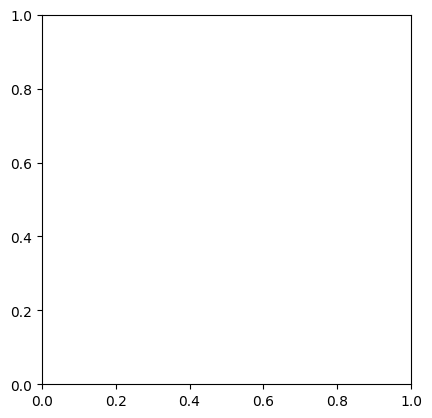

In [39]:
deformed_img = deformer.deform_card(img_path, (660 * 2, 880 * 2))
plt.imshow(deformed_img)

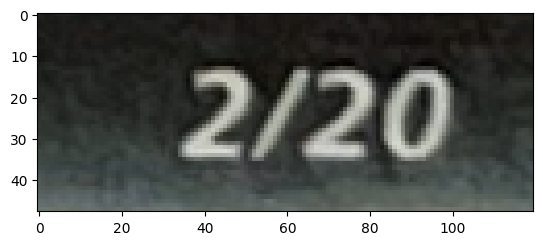

In [71]:
# img_crop_dark = crop_id(
#     crop_padding(crop_card(deformed_img, size=(72 * 2, 184 * 2))[1]), (80, 40, 140, 28)
# )
# img_crop_dark = Image.fromarray(img_crop_dark)
# draw.show_color(img_crop_dark)
# img_crop_dark.save(PROJECT_PATH / "data/id_light_text1.png")

In [48]:
# img_crop_dark = crop_id(
#     crop_padding(crop_card(deformed_img, size=(72 * 2, 184 * 2))[0]), (180, 40, 20, 28)
# )
# img_crop_dark = Image.fromarray(img_crop_dark)
# img_crop_dark.save(PROJECT_PATH / "data/id_dark_text1.png")

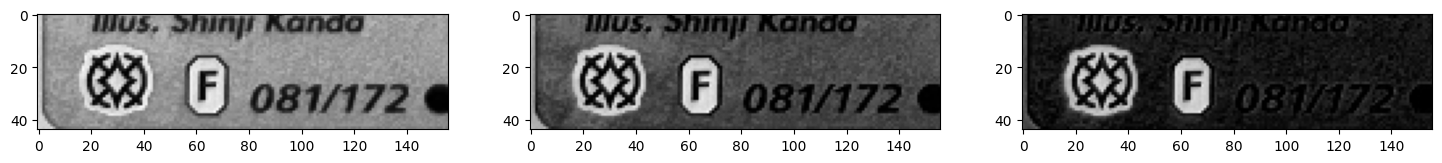

In [15]:
img_cropped = crop_padding(crop_card(deformed_img)[0])
draw.show_channels(img_cropped)

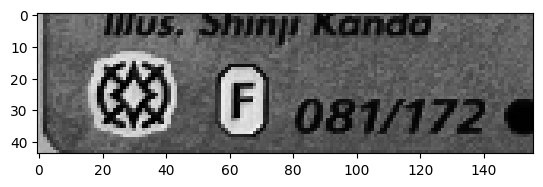

In [76]:
deformed_img_grey = cv2.cvtColor(img_cropped, cv2.COLOR_RGB2GRAY)
draw.show_grey(deformed_img_grey)

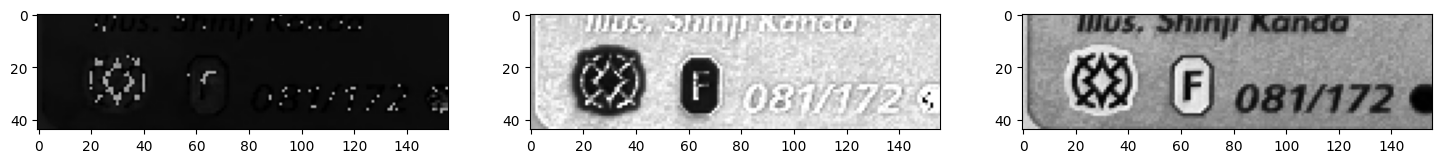

In [78]:
deformed_img_hsv = cv2.cvtColor(img_cropped, cv2.COLOR_RGB2HSV)
draw.show_channels(deformed_img_hsv)

In [81]:
ocr_text(deformed_img_grey)

'6'